In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cols = ['product_names','product_category','brand','ingredient','size','price']
skin_care_df = pd.read_csv('../web_scraper/skin_care_products.csv', usecols = cols)
body_care_df = pd.read_csv('../web_scraper/body_care_products.csv', usecols = cols)
makeup_df = pd.read_csv('../web_scraper/makeup_products.csv', usecols = cols)

number of skin care categories 28


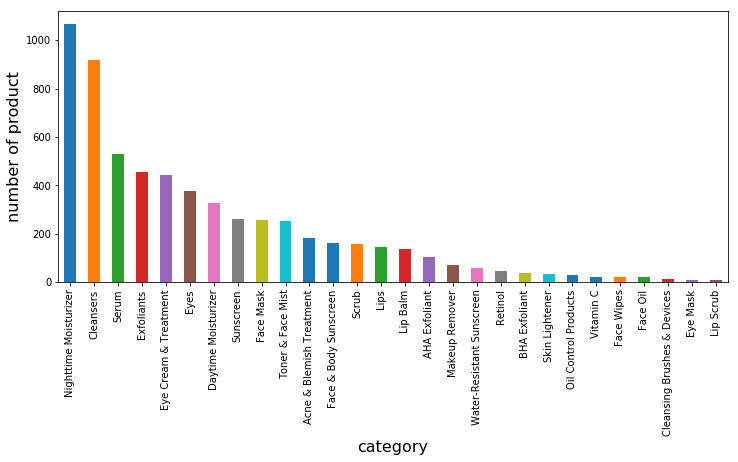

number of body care categories 6


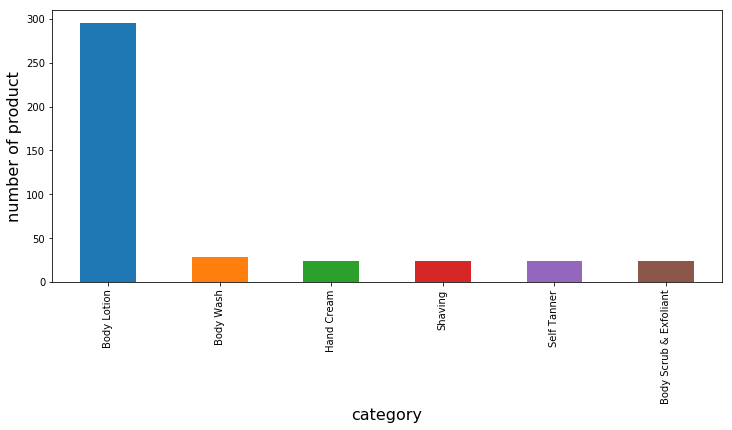

number of makeup categories 24


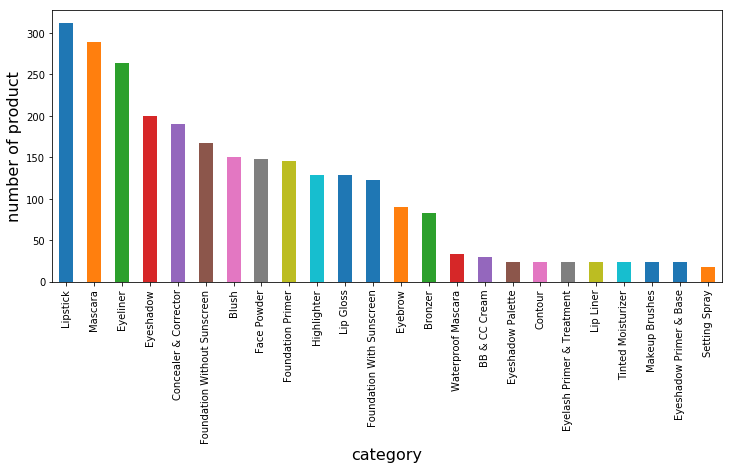

In [64]:
def report_category(df, message):
    print ('number of %s categories'%message, df['product_category'].nunique())
    count = df['product_category'].value_counts()
    plt.figure(figsize=(12,5))
    count.plot.bar()
    plt.xlabel('category', fontsize=16)
    plt.ylabel('number of product', fontsize=16)
    plt.show()
    
report_category(skin_care_df, 'skin care')
report_category(body_care_df, 'body care')
report_category(makeup_df, 'makeup')

number of skin care brands 224


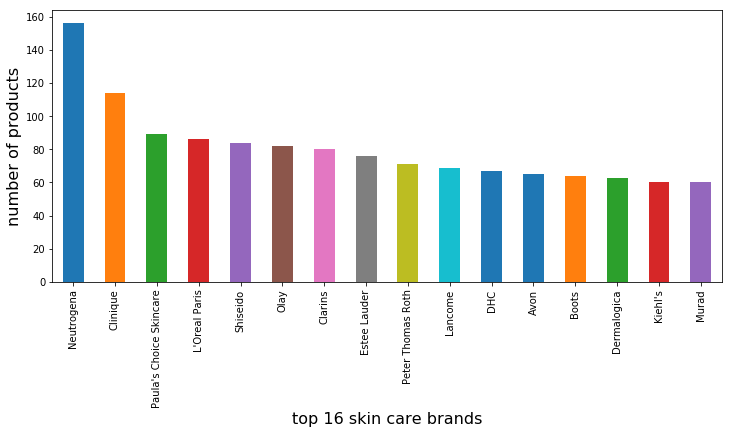

number of body care brands 107


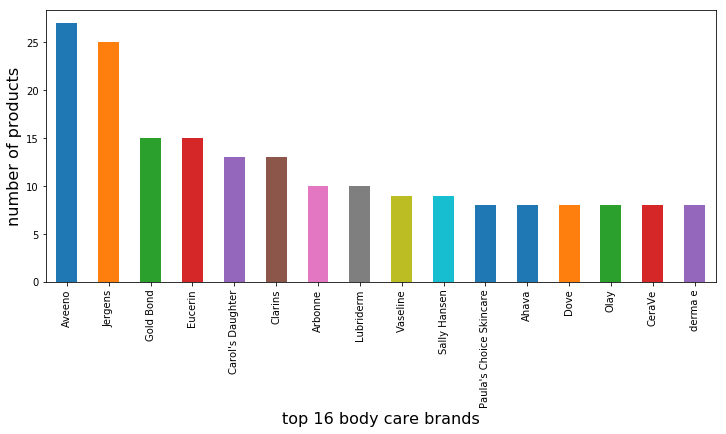

number of makeup brands 133


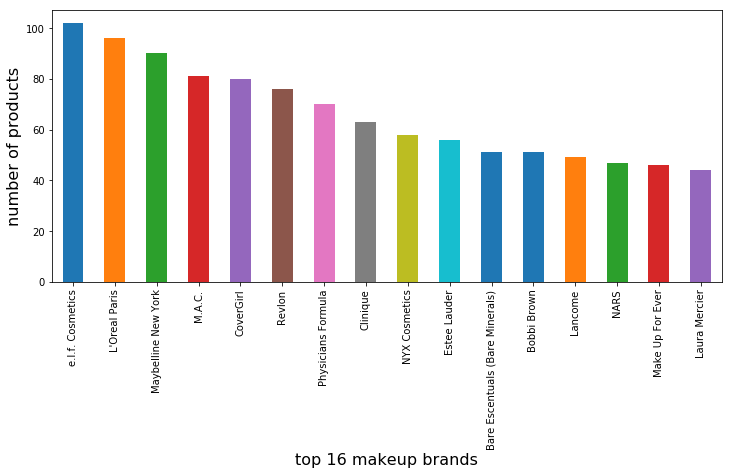

In [65]:
def report_brand(df, message, ntop_brand = 16):
    print ('number of %s brands'%message, df['brand'].nunique())
    count = df.groupby('brand')['product_names'].nunique().sort_values(ascending=False)[:ntop_brand]
    plt.figure(figsize=(12,5))
    count.plot.bar(stacked=True)
    plt.xlabel('top %d %s brands'%(ntop_brand, message), fontsize=16)
    plt.ylabel('number of products', fontsize=16)
    plt.show()
    
report_brand(skin_care_df, 'skin care')
report_brand(body_care_df, 'body care')
report_brand(makeup_df, 'makeup')

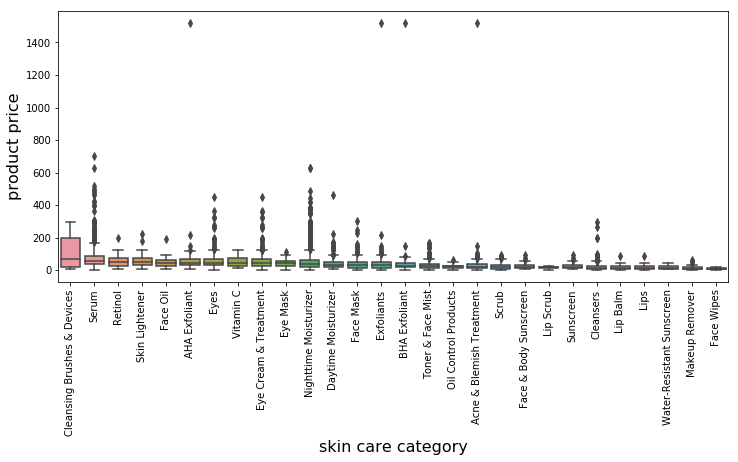

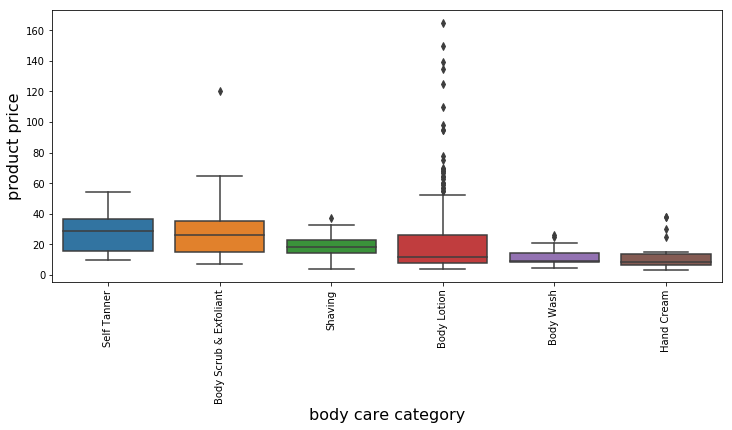

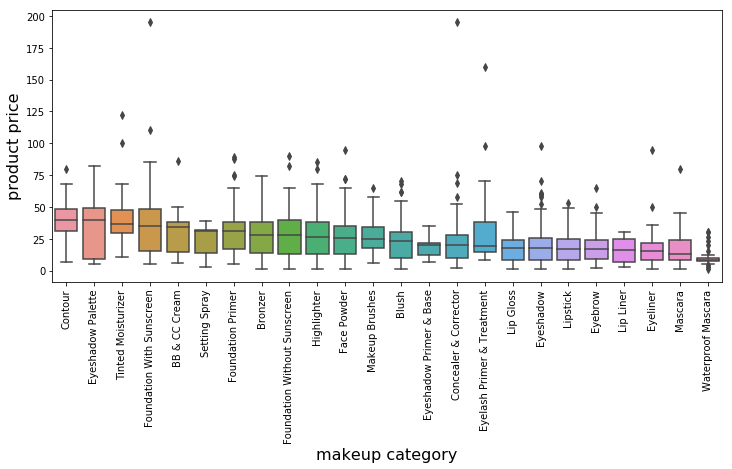

In [70]:
def report_price_by_category(df, message):
    if df['price'].dtype != 'float':
        df['price'] = df['price'].apply(lambda x: x.replace(',','')).astype('float')
    median_price_by_cat = df.groupby('product_category')['price'].median().sort_values(ascending=False)
    plt.figure(figsize=(12,5))
    ax = sns.boxplot(x='product_category', y='price', order=median_price_by_cat.index.values, data=df)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.xlabel('%s category'%message, fontsize=16)
    plt.ylabel('product price', fontsize=16)
    plt.show()
    
report_price_by_category(skin_care_df, 'skin care')
report_price_by_category(body_care_df, 'body care')
report_price_by_category(makeup_df, 'makeup')

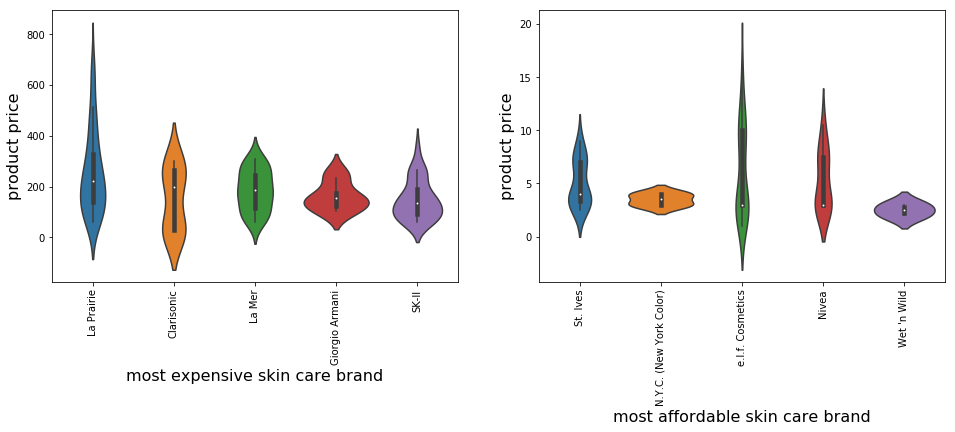

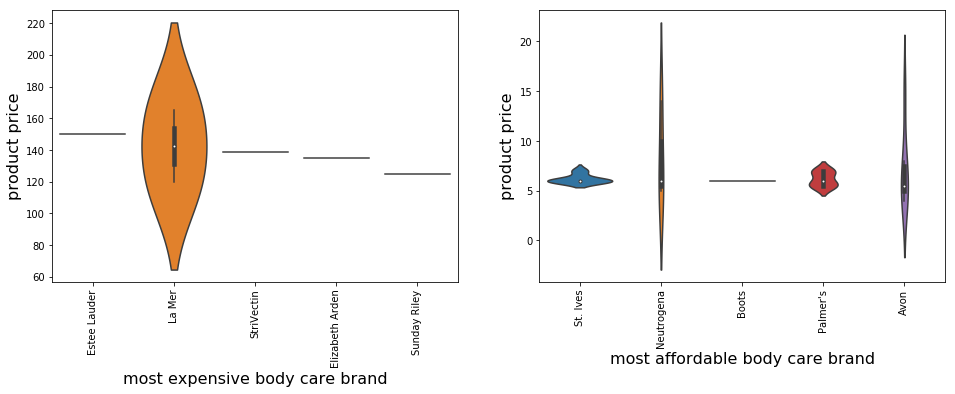

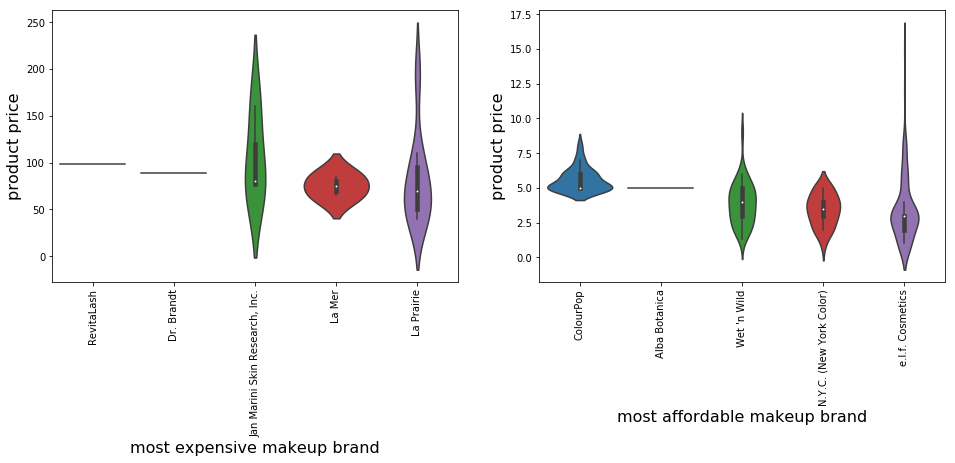

In [68]:
def report_price_by_brand(df, message, ntop=5, nbot=5):
    if df['price'].dtype != 'float':
        df['price'] = df['price'].apply(lambda x: x.replace(',','')).astype('float')
    median_price_by_brand = df.groupby('brand')['price'].median().sort_values(ascending=False)
    
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    ax = sns.violinplot(x='brand', y='price', 
                     order=median_price_by_brand.index.values[:ntop],
                     data=df.loc[df['brand'].isin(median_price_by_brand.index.values[:ntop])])
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.xlabel('most expensive %s brand'%message, fontsize=16)
    plt.ylabel('product price', fontsize=16)
    
    plt.subplot(1,2,2)
    ax = sns.violinplot(x='brand', y='price', 
                     order=median_price_by_brand.index.values[-nbot:],
                     data=df.loc[df['brand'].isin(median_price_by_brand.index.values[-nbot:])])
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.xlabel('most affordable %s brand'%message, fontsize=16)
    plt.ylabel('product price', fontsize=16)
    plt.show()
    
report_price_by_brand(skin_care_df, 'skin care')
report_price_by_brand(body_care_df, 'body care')
report_price_by_brand(makeup_df, 'makeup')